In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [2]:
#linear demand
    
A = [[-3, -2],[-1, -3]]
B = [6,6]
#create dynamics
#vector: x1, x2, dx2, beta
#let's just use list
def dynamics(state, t):
    state_dot = [0,0,0,0]
    state_dot[0] = 2*A[0][0]*state[0] + A[0][1]*state[1] + B[0] + (1-state[3])*state[2]*A[0][1]
    #might need to look at sign for state[2]
    state_dot[1] = 2*A[1][1]*state[1] + A[1][0]*state[0] + B[1] + 2*A[1][1]*state[2]
    
    #when surplus is negative, both beta and delta x should go to 0
    state_dot[2] = 2*A[1][1]*state[1] + A[1][0]*state[0] + B[1] + 2*A[1][1]*state[2] + state[3]*state[0]*A[0][1]
    #need to think more about the beta dynamics. Currently drive us to 0
    state_dot[3] = A[0][1]*state[0]*((1-state[3])*(state[0]*A[0][1]/(-2*A[1][1])) - state[2])
    
    #divy up surplus evenly
    #state_dot[3] = 0
    
    #check bounds
    if state[0] <=0 and state_dot[0] < 0:
        state_dot[0] = 0
    if state[1] <=0 and state_dot[1] < 0:
        state_dot[1] = 0
    if (state[1] + state[2]) <= 0 and state_dot < 0:
        state_dot[2] = 0
    if state[3] >= 1 and state_dot[3] > 0:
        #print 'Top bound'
        #print state, state_dot
        state_dot[3] = 0
    if state[3] <= 0 and state_dot[3] < 0:
        #print 'bound'
        state_dot[3] = 0
    if state_dot[2] == -1*state_dot[1]:
        state_dot[2] = 0
        state_dot[1] = 0
    return state_dot
    

In [3]:
x0 = [0,0,0,.1]
#x0 = [12/17,15/17,0,.5]
t = np.linspace(0.0, 5.0, 20000)
x = odeint(dynamics, x0, t)

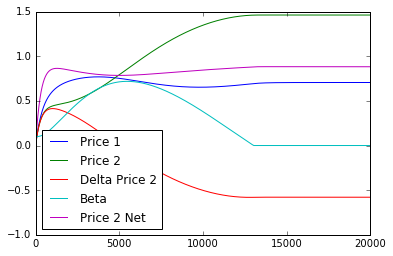

In [4]:
df = pd.DataFrame(x)
df.columns = ['Price 1', 'Price 2', 'Delta Price 2', 'Beta']
df['Price 2 Net'] = df['Price 2'] + df['Delta Price 2']
df.plot()

In [5]:
df['Profit 1'] = df['Price 1']*(A[0][0]*df['Price 1'] + A[0][1]*df['Price 2 Net'] + B[0])
df['Profit 2'] = df['Price 2 Net']*(A[1][1]*df['Price 2 Net'] + A[1][0]*df['Price 1'] + B[1])
df['Total 1'] = df['Profit 1'] - df['Beta']*(df['Price 1']*df['Delta Price 2']*A[0][1])
df['Total 2'] = df['Profit 2'] + df['Beta']*(df['Price 1']*df['Delta Price 2']*A[0][1])
df['Social Welfare'] = df['Profit 1'] + df['Profit 2']
df['Surplus'] = df['Price 1']*df['Delta Price 2']*A[0][1]

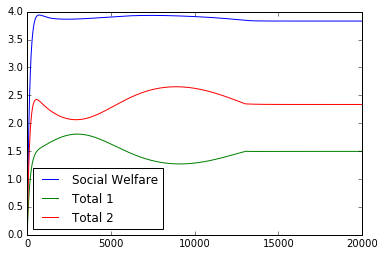

In [6]:
df[['Social Welfare', 'Total 1', 'Total 2']].plot()

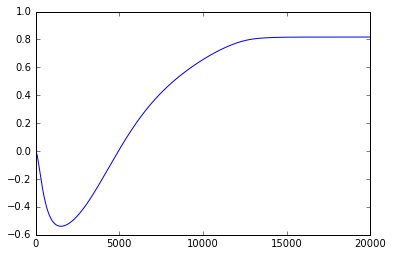

In [62]:
df['Surplus'].plot()

In [64]:
print df['Beta']

0        1.000000e-01
1        1.000000e-01
2        1.000000e-01
3        1.000000e-01
4        1.000000e-01
5        1.000001e-01
6        1.000001e-01
7        1.000002e-01
8        1.000002e-01
9        1.000003e-01
10       1.000005e-01
11       1.000006e-01
12       1.000008e-01
13       1.000010e-01
14       1.000013e-01
15       1.000016e-01
16       1.000019e-01
17       1.000023e-01
18       1.000027e-01
19       1.000032e-01
20       1.000037e-01
21       1.000043e-01
22       1.000050e-01
23       1.000057e-01
24       1.000064e-01
25       1.000072e-01
26       1.000081e-01
27       1.000091e-01
28       1.000101e-01
29       1.000112e-01
             ...     
19970   -1.789263e-10
19971   -1.789263e-10
19972   -1.789263e-10
19973   -1.789263e-10
19974   -1.789263e-10
19975   -1.789263e-10
19976   -1.789263e-10
19977   -1.789263e-10
19978   -1.789263e-10
19979   -1.789263e-10
19980   -1.789263e-10
19981   -1.789263e-10
19982   -1.789263e-10
19983   -1.789263e-10
19984   -1